In [5]:
from glob import glob
import pandas as pd
paths = glob('./data/*/*/*')
data = pd.DataFrame([path.split('/')[2:] for path in paths], columns=['subject', 'pose', 'filename'])
data['path'] = paths
data['dataframe'] = [pd.read_pickle(path) for path in data['path']]
data = data.sort_values(['subject', 'pose']).reset_index(drop=True)
data

,subject,pose,filename,path,dataframe
0,0,gait10,GAIT10-2.pickle,./data/0/gait10/GAIT10-2.pickle,Category force x_coord ...
1,0,gait10,GAIT10-1.pickle,./data/0/gait10/GAIT10-1.pickle,Category force x_coord...
2,0,gait5,GAIT05.pickle,./data/0/gait5/GAIT05.pickle,Category force x_coord ...
3,0,gait5,GAIT05-2.pickle,./data/0/gait5/GAIT05-2.pickle,Category force x_coo...
4,0,scan,SCAN2.pickle,./data/0/scan/SCAN2.pickle,Category force x_coor...
...,...,...,...,...,...
68,6,scan,SCAN1.pickle,./data/6/scan/SCAN1.pickle,Category force x_coo...
69,6,squat,SQUAT1.pickle,./data/6/squat/SQUAT1.pickle,Category force x_coord ...
70,6,squat,SQUAT2.pickle,./data/6/squat/SQUAT2.pickle,Category force x_coord ...
71,6,sts,STS2.pickle,./data/6/sts/STS2.pickle,Category force x_coord ...


In [6]:
sample = data.loc[0, 'dataframe']
sample

Category force                        x_coord                              \
Position     A   B   C    D    E  F         A       B         C         D   
0            0   0   0   22    0  0       NaN     NaN       NaN  6.659091   
1            0   0   0  277    0  0       NaN     NaN       NaN  6.144404   
2            0   0   0  488    0  0       NaN     NaN       NaN  5.908811   
3            0   0   0  501    0  0       NaN     NaN       NaN  5.918164   
4            0   0   0  540    0  0       NaN     NaN       NaN  5.916667   
..         ...  ..  ..  ...  ... ..       ...     ...       ...       ...   
559        127  16  21    0  221  0  7.618110  8.0625  2.904762       NaN   
560         87   0   0    0  195  0  7.459770     NaN       NaN       NaN   
561         45   0   0    0  147  0  7.088889     NaN       NaN       NaN   
562          9   0   0    0   84  0  6.000000     NaN       NaN       NaN   
563          7   0   0    0   32  0  6.000000     NaN       NaN       NaN   

Category  ... FSR_for_force               FSR_for_coord                 \
Position  ...             C    D    E   F             A    B         C   
0         ...             0    0    0   0      0.000000  0.0  0.000000   
1         ...             0   60    0   0      0.000000  0.0  0.000000   
2         ...             0   73    0   0      0.000000  0.0  0.000000   
3         ...             0   84    0   0      0.000000  0.0  0.000000   
4         ...             0  100    0   0      0.000000  0.0  0.000000   
..        ...           ...  ...  ...  ..           ...  ...       ...   
559       ...            40    0  163  56      1.190476  0.0  0.634921   
560       ...            38    0  137  51      1.031746  0.0  0.603175   
561       ...            36    0  110  45      0.873016  0.0  0.571429   
562       ...             0    0   83  37      0.714286  0.0  0.000000   
563       ...             0    0   61   0      0.555556  0.0  0.000000   

Category                                
Position         D         E         F  
0         0.000000  0.000000  0.000000  
1         0.952381  0.000000  0.000000  
2         1.158730  0.000000  0.000000  
3         1.333333  0.000000  0.000000  
4         1.587302  0.000000  0.000000  
..             ...       ...       ...  
559       0.000000  2.587302  0.888889  
560       0.000000  2.174603  0.809524  
561       0.000000  1.746032  0.714286  
562       0.000000  1.317460  0.587302  
563       0.000000  0.968254  0.000000  

[564 rows x 30 columns]

In [21]:
import matplotlib.pyplot as plt

def plot_coord(ax, sample):
    ax.set_xlim(-10, 20)
    ax.set_ylim(30, 0)
    ax.set_aspect('equal')
    ax.set_xticks([0, 10], labels=['outside', 'inside'])
    ax.set_yticks([5, 25], labels=['toe', 'heel'])
    for col in 'ABCDEF':
        ax.scatter(sample['x_coord'][col], sample['y_coord'][col], s=5, label=col)
        
def plot_cop(ax, sample):
    ax.set_xlim(-10, 20)
    ax.set_ylim(30, 0)
    ax.set_aspect('equal')
    ax.set_xticks([0, 10], labels=['outside', 'inside'])
    ax.set_yticks([5, 25], labels=['toe', 'heel'])
    cop_x = (sample['force'] * sample['x_coord']).sum(axis=1)/sample['force'].sum(axis=1)
    cop_y = (sample['force'] * sample['y_coord']).sum(axis=1)/sample['force'].sum(axis=1)
    ax.scatter(cop_x, cop_y, s=5, c=range(len(cop_x)), cmap='winter')

def plot_force(ax, sample):
    for col in 'ABCDEF':
        ax.plot(sample['force'][col], label=col)

def plot_fsr_for_force(ax, sample):
    for col in 'ABCDEF':
        ax.plot(sample['FSR_for_force'][col], label=col, linestyle='--')

def plot_fsr_for_coord(ax, sample):
    for col in 'ABCDEF':
        ax.plot(sample['FSR_for_coord'][col], label=col, linestyle='-.')

def plot_list(data, *plot, axis_size=(2.5, 2.5), max_col=5):
    count = len(data)
    ncol = (count + max_col - 1) // max_col
    nrow = max_col
    fig, axes = plt.subplots(ncol, nrow, figsize=(nrow * axis_size[0], ncol * axis_size[1]), sharex=True, sharey=True)
    axes = axes.flatten() if count > 1 else [axes]
    for i in range(count):
        for p in plot:
            p(axes[i], data.loc[i, 'dataframe'])
        axes[i].set_title(data.loc[i, 'path'], fontsize=10)
    
    handles, labels = axes[0].get_legend_handles_labels()
    if handles and labels:
        fig.legend(handles, labels, loc='outside right upper')
    fig.tight_layout()
    for i in range(count, len(axes)):
        fig.delaxes(axes[i])

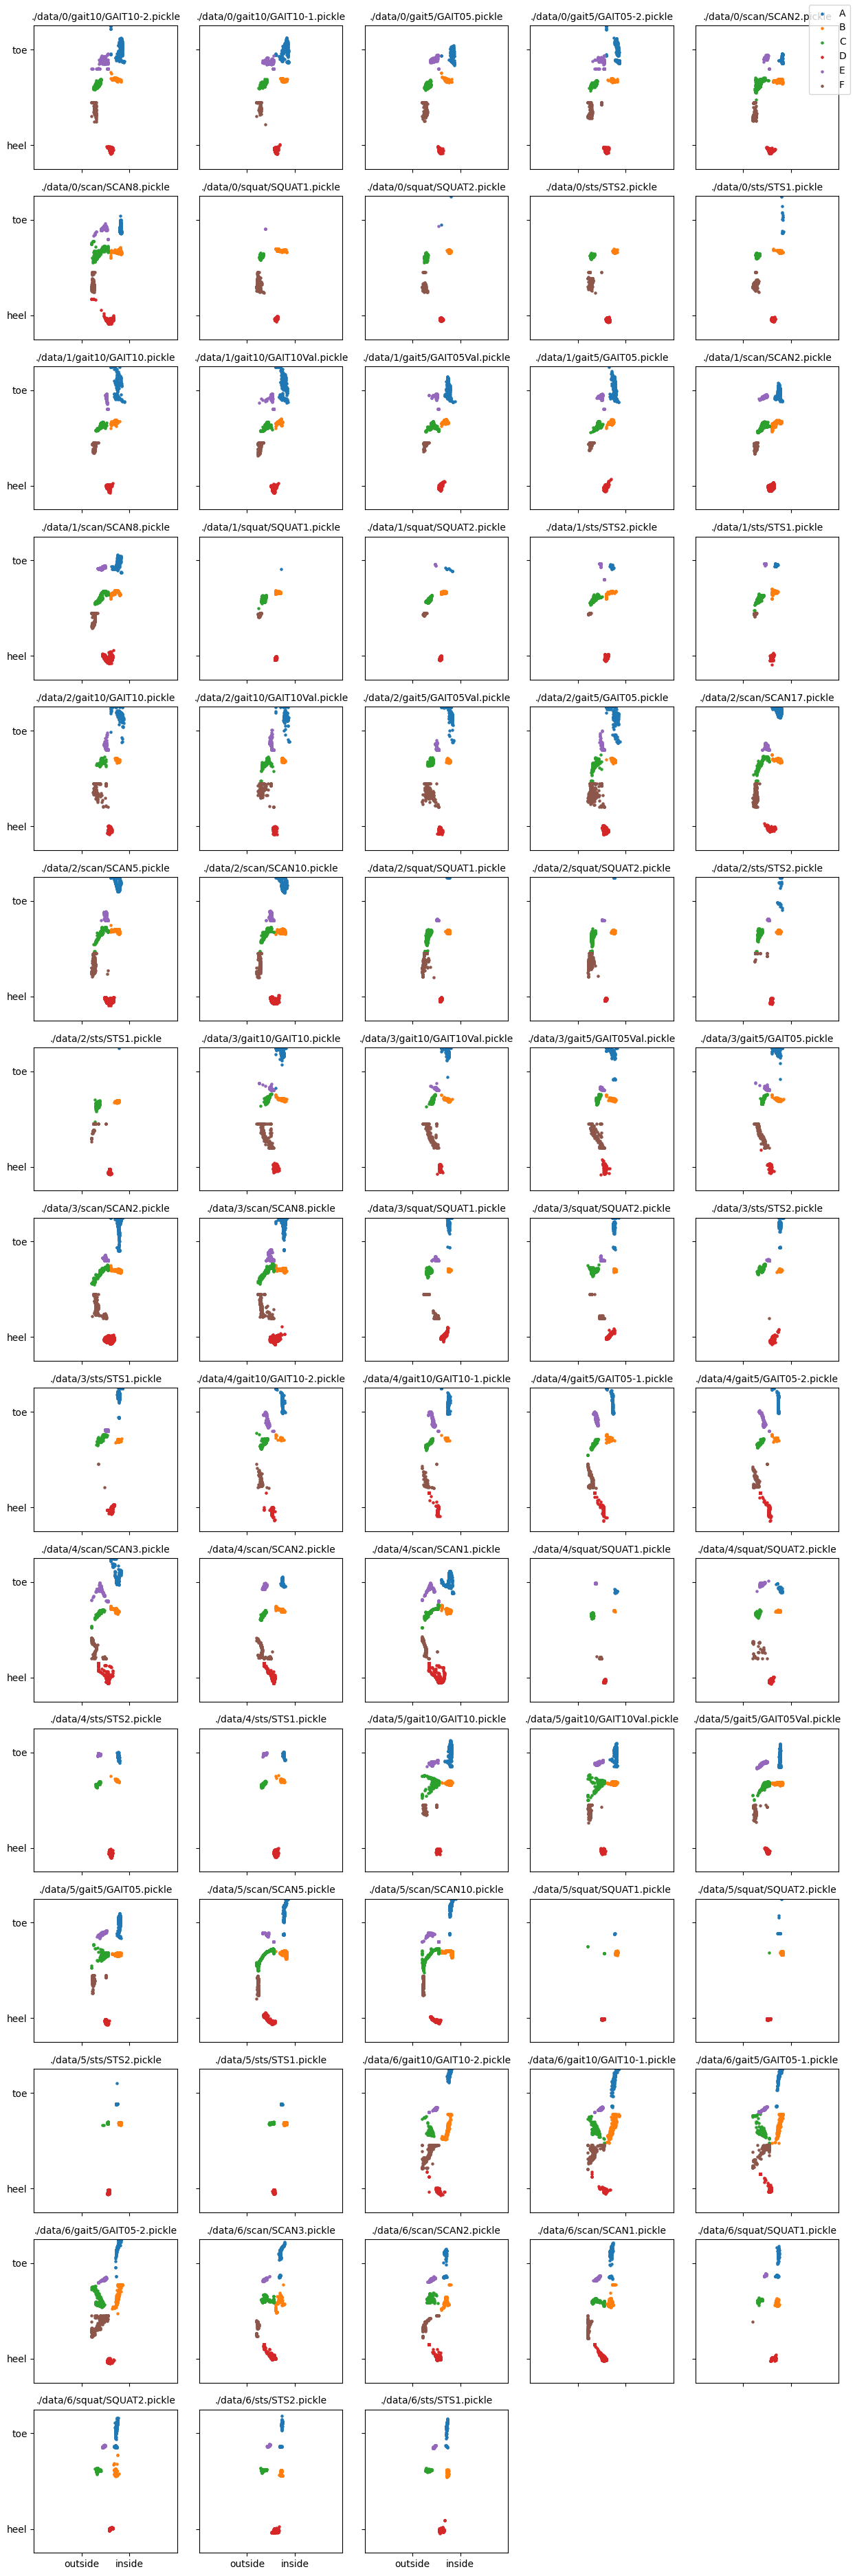

In [22]:
plot_list(data, plot_coord)

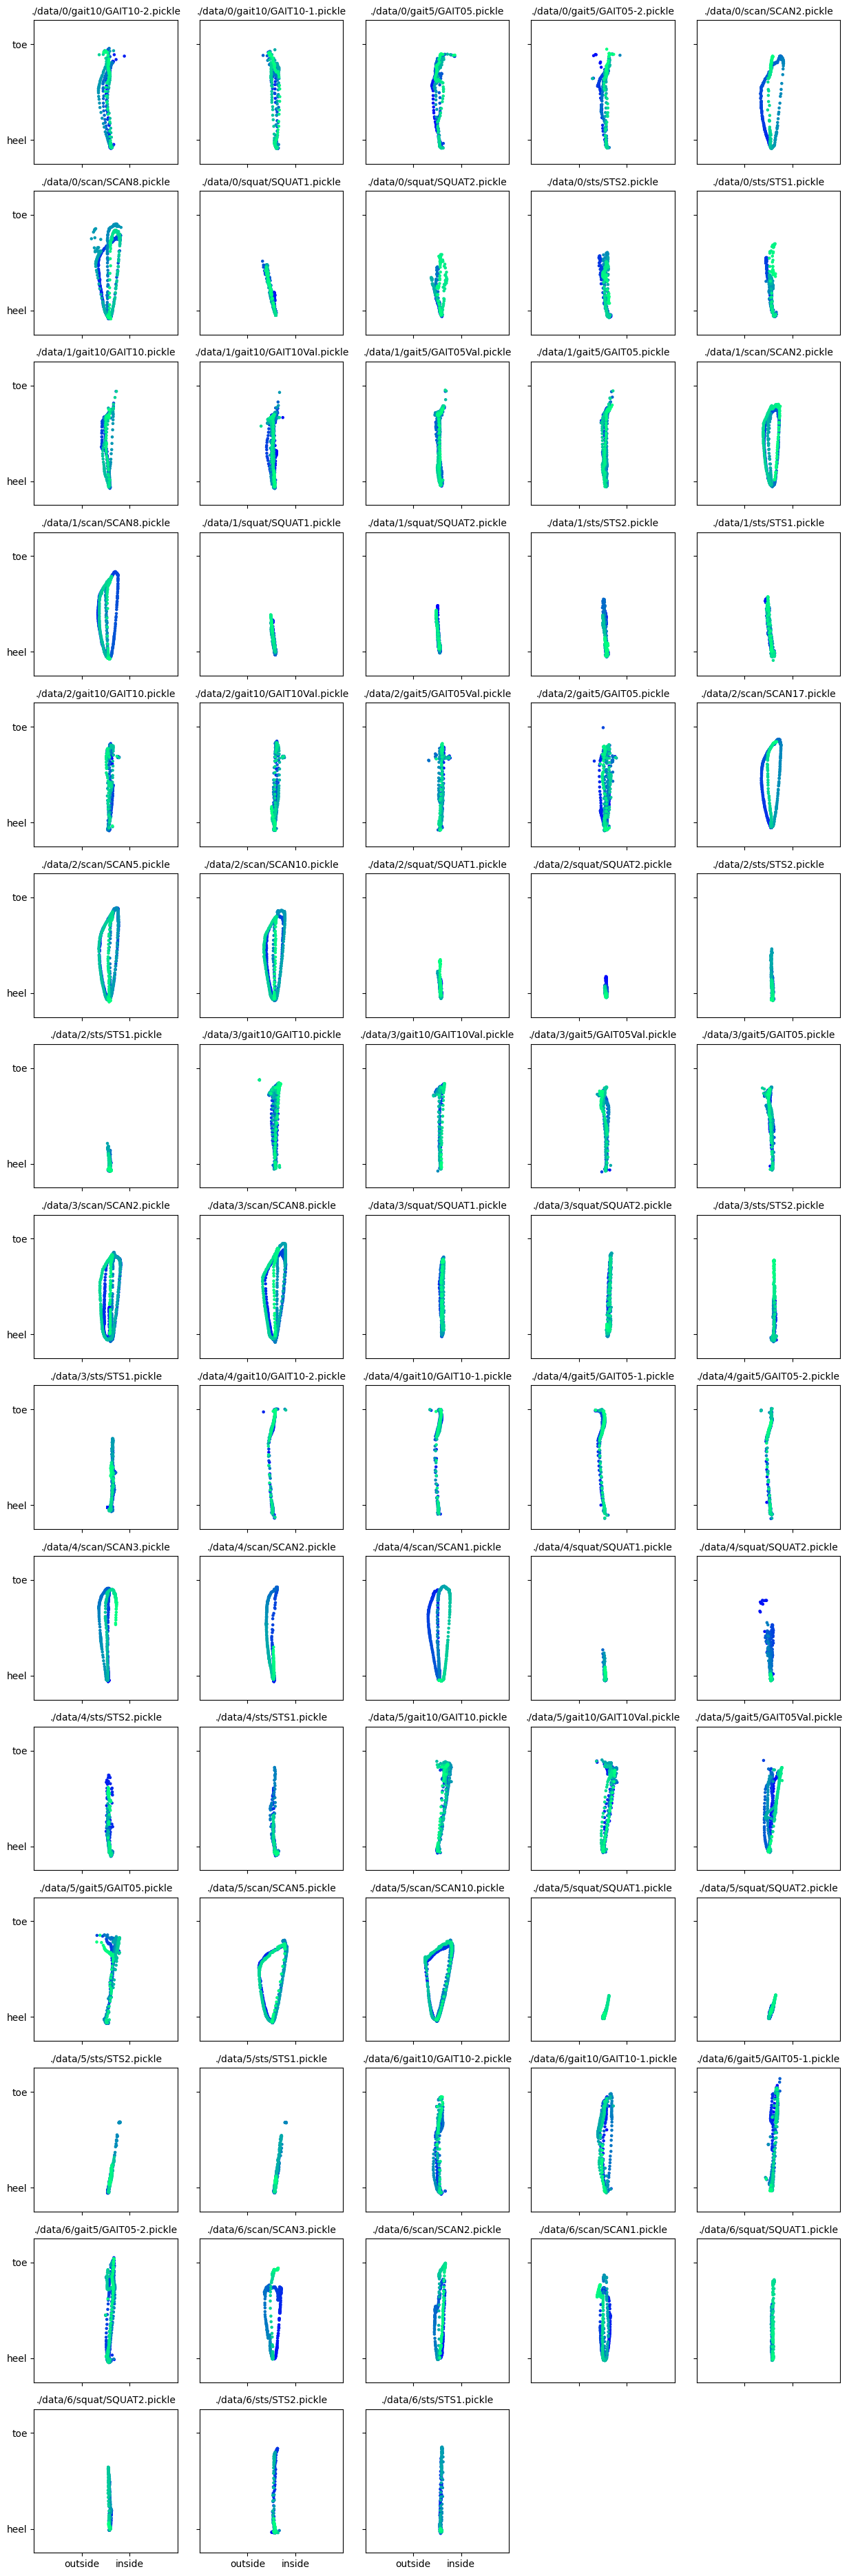

In [23]:
plot_list(data, plot_cop)

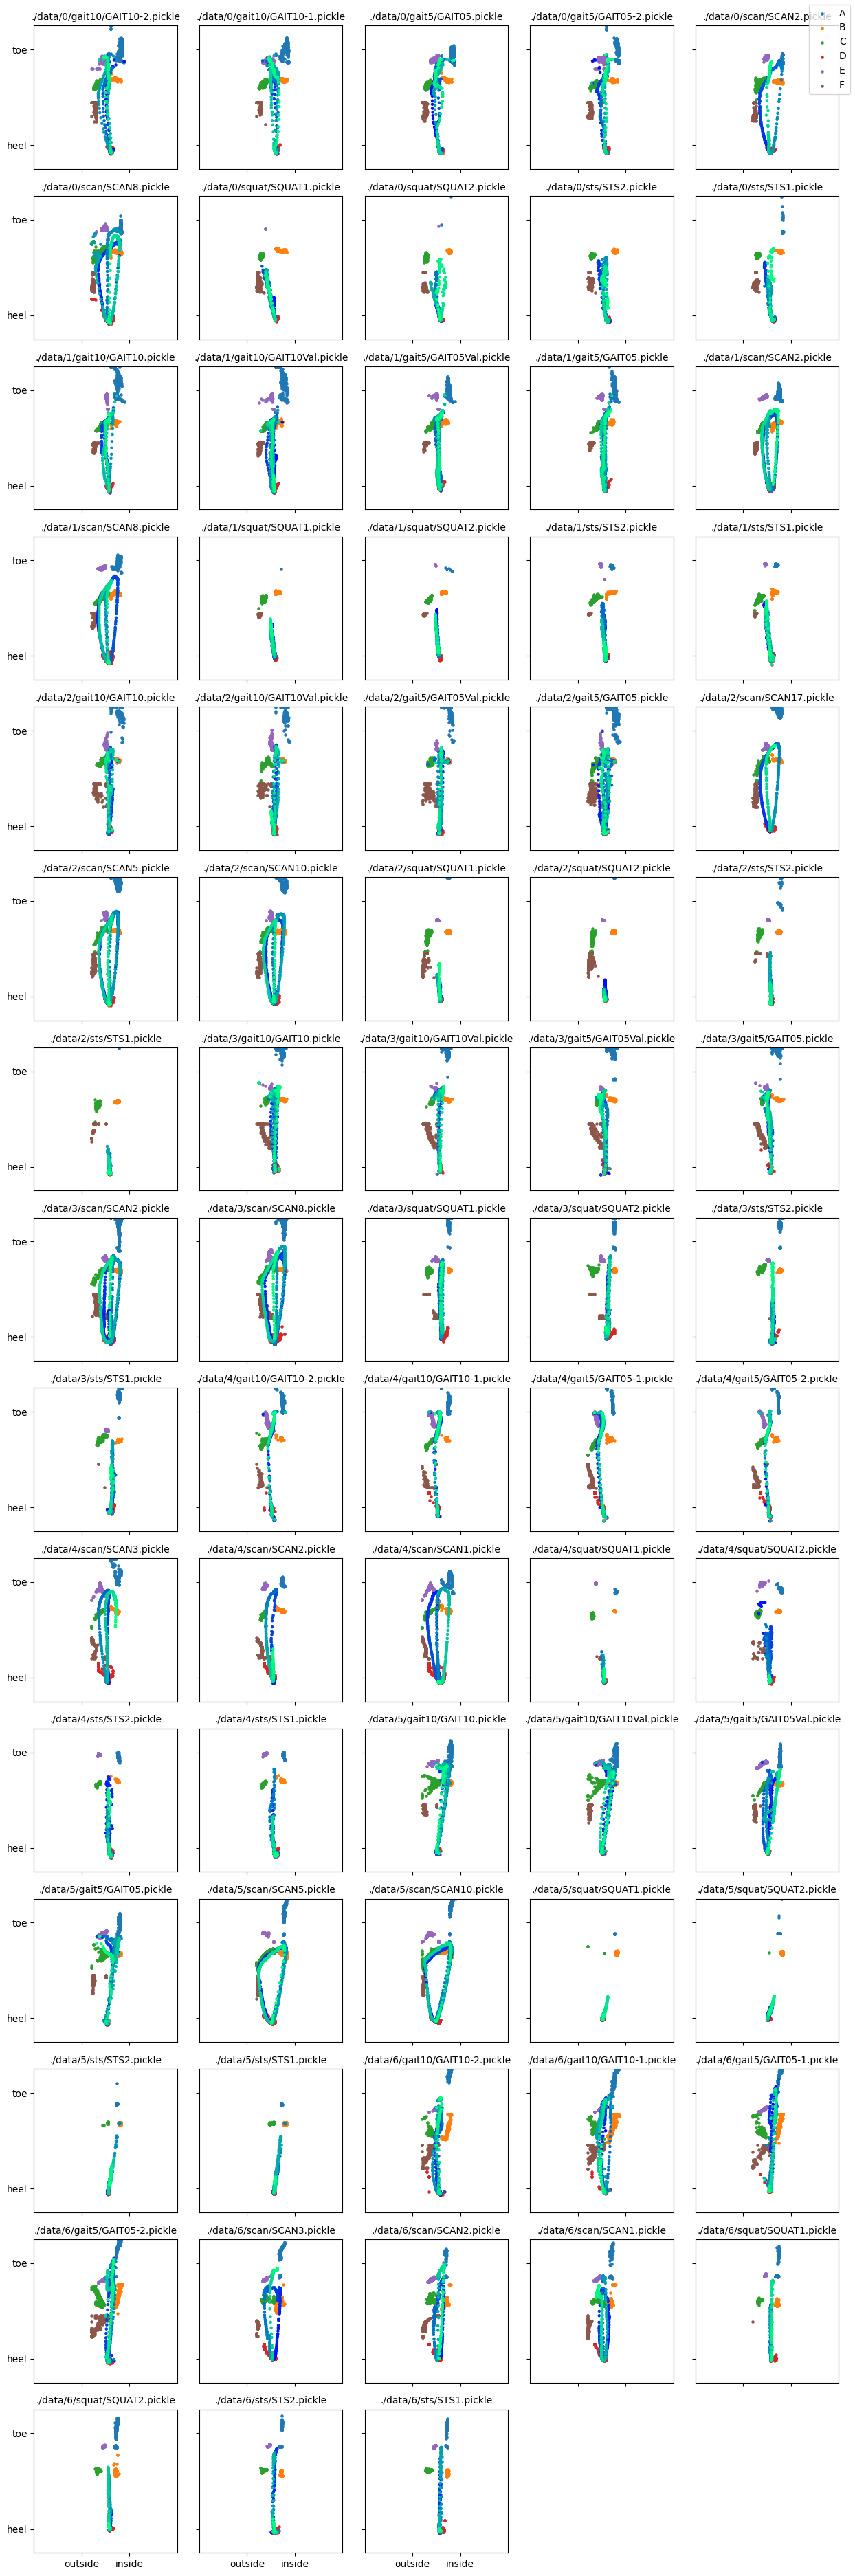

In [24]:
plot_list(data, plot_coord, plot_cop)

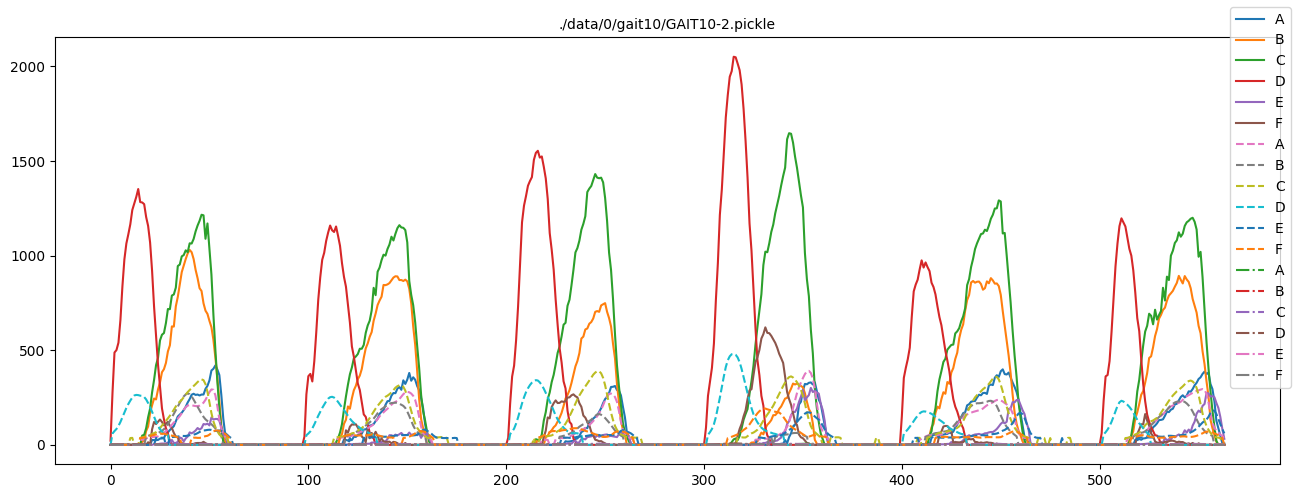

In [25]:
plot_list(data[:1], plot_force, plot_fsr_for_force, plot_fsr_for_coord, axis_size=(13, 5), max_col=1)

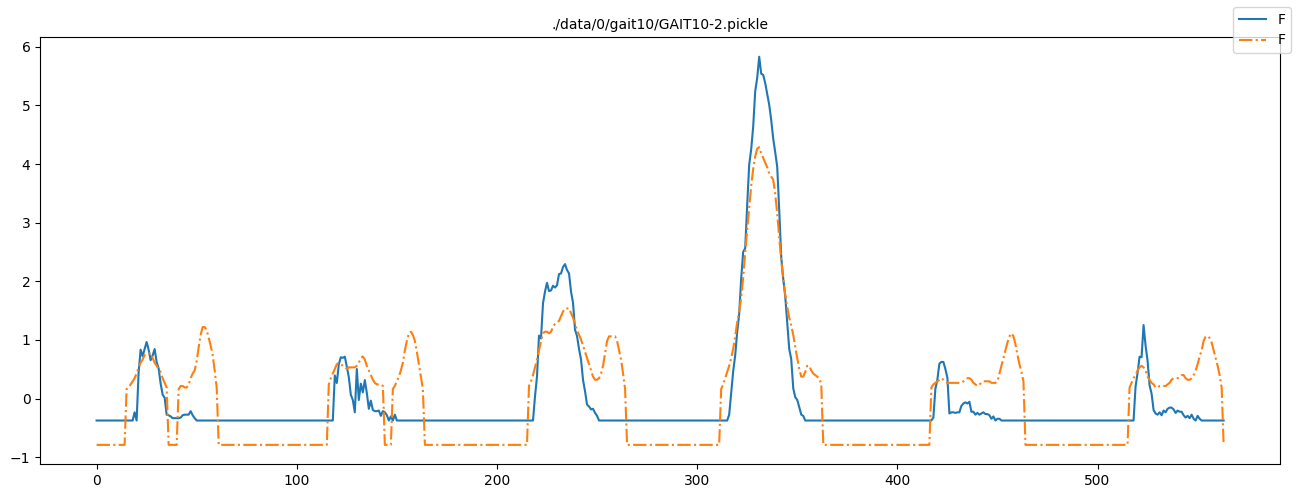

In [36]:
from sklearn.preprocessing import StandardScaler

def plot_force_scale(ax, sample):
    scaler = StandardScaler()
    sample = pd.DataFrame(scaler.fit_transform(sample), columns=sample.columns, index=sample.index)
    for col in 'F':
        ax.plot(sample['force'][col], label=col)

def plot_fsr_for_coord_scale(ax, sample):
    scaler = StandardScaler()
    sample = pd.DataFrame(scaler.fit_transform(sample), columns=sample.columns, index=sample.index)
    for col in 'F':
        ax.plot(sample['FSR_for_coord'][col], label=col, linestyle='-.')

plot_list(data[:1], plot_force_scale, plot_fsr_for_coord_scale, axis_size=(13, 5), max_col=1)

같은 길이의 두 개의 시계열 데이터가 있을 때

파란색 선은 그대로 두고 주황색 선에만 임의의 수를 더하거나 곱할 수 있다고 할 때

두 시계열 데이터간의 RMSE가 최소로 되도록 하려면

두 데이터의 평균과 분산이 같아지도록 만들면 RMSE가 최소가 되려나?

linear layer하나 놓고 인공지능 돌려볼까?

In [76]:
x = data.loc[0, 'dataframe']['FSR_for_force', 'F']
y = data.loc[0, 'dataframe']['force', 'F']
x = (x - x.mean()) / x.std()
y = (y - y.mean()) / y.std()

mse 0.37552707725759105
mae 0.5364798745406514


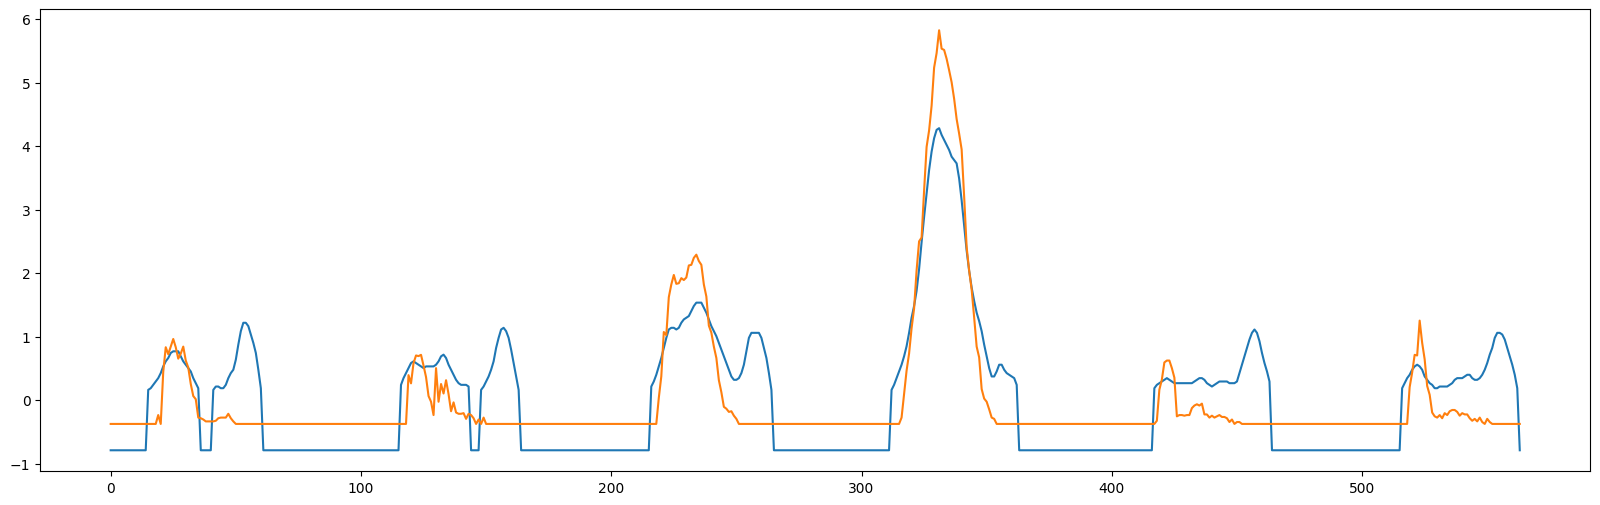

In [77]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.figure(figsize=(20, 6))
plt.tight_layout()
plt.plot(x)
plt.plot(y)
print('mse', mean_squared_error(x, y))
print('mae', mean_absolute_error(x, y))

0.03531776659193897
0.07326514399778522
mse 0.3402093106656521
mae 0.46321473054286616


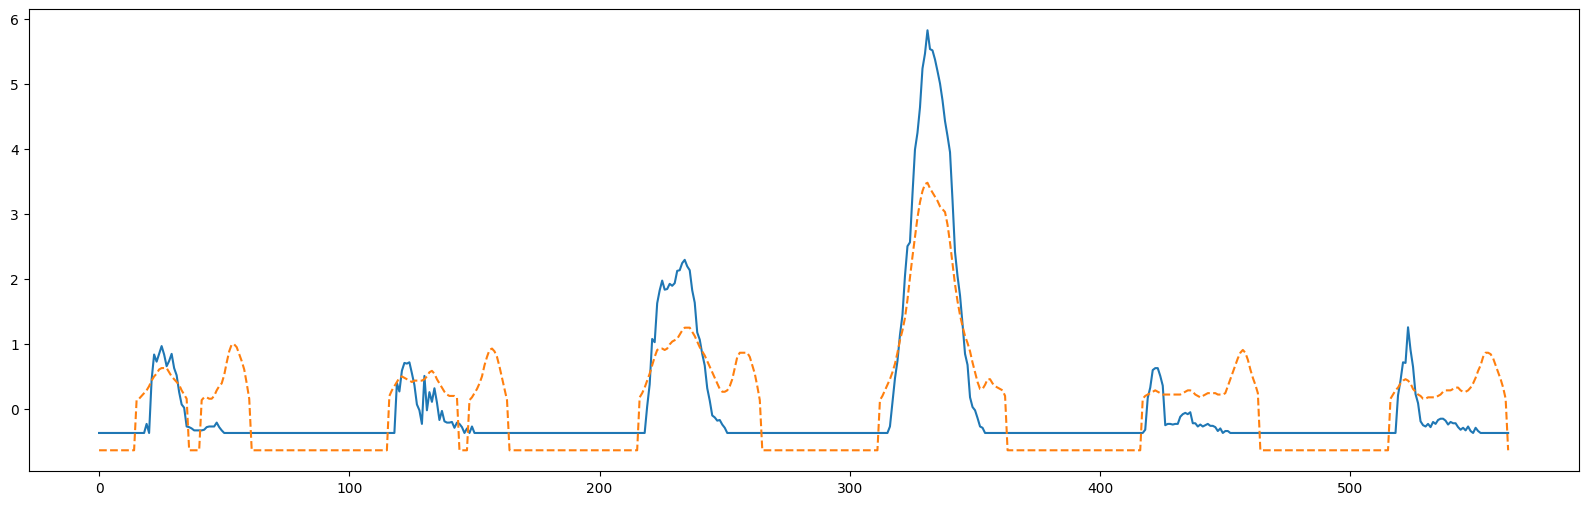

In [78]:
import torch
import matplotlib.pyplot as plt
import numpy as np
num_epochs = 100000
x = torch.tensor(x, dtype=torch.float64)
y = torch.tensor(y, dtype=torch.float64)
model = torch.nn.Conv1d(1, 1, kernel_size=1).double()
torch.nn.init.constant_(model.weight, 1)
torch.nn.init.constant_(model.bias, 0)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1)
for i in range(num_epochs):
    pred = model(x.unsqueeze(0)).squeeze()
    loss = criterion(pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
pred = model(x.unsqueeze(0)).squeeze().detach().numpy()
plt.figure(figsize=(20, 6))
plt.tight_layout()
plt.plot(y)
plt.plot(pred, linestyle='--')
print(mean_squared_error(x, y) - mean_squared_error(pred, y))
print(mean_absolute_error(x, y) - mean_absolute_error(pred, y))
print('mse', mean_squared_error(pred, y))
print('mae', mean_absolute_error(pred, y))

mse는 0.035향상, mae는 0.732 향상될 수 있다.